<a href="https://colab.research.google.com/github/probml/pyprobml/blob/master/notebooks/intro/unsuper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised learning <a class="anchor" id="unsuper"></a>

Unsupervised learning is less well-defined than supervised learning, since there is no specific input-output mapping whose accuracy we can use to measure performance. Instead we often focus on maximizing the likelihood of the data, and hope that the model learns "something interesting". We give some simple examples of this below.

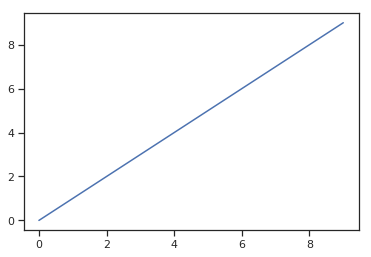

In [1]:
# Standard Python libraries
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import time
import numpy as np
import glob
import matplotlib.pyplot as plt
import PIL
import imageio

from IPython import display

import sklearn

import seaborn as sns;
sns.set(style="ticks", color_codes=True)

import pandas as pd
pd.set_option('precision', 2) # 2 decimal places
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 30)
pd.set_option('display.width', 100) # wide windows

# Check we can plot stuff
plt.figure()
plt.plot(range(10))

## Clustering iris data using a Gaussian mixture model (GMM)

In this section, we show how to find clusters in an unlabeled 2d version of the Iris dataset by fitting a GMM using sklearn.




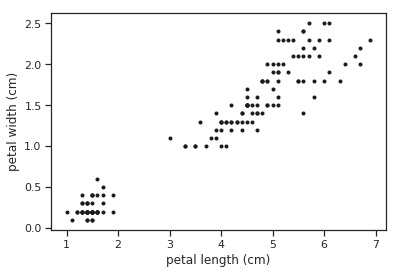

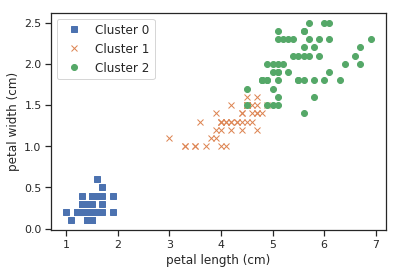

In [2]:
import seaborn as sns

from sklearn.datasets import load_iris
#from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

iris = load_iris()
X = iris.data

fig, ax = plt.subplots()
idx1 = 2; idx2 = 3;
ax.scatter(X[:, idx1], X[:, idx2], c="k", marker=".")
ax.set(xlabel = iris.feature_names[idx1])
ax.set(ylabel = iris.feature_names[idx2])
#save_fig("iris-2d-unlabeled")
plt.show()


K = 3
y_pred = GaussianMixture(n_components=K, random_state=42).fit(X).predict(X)
mapping = np.array([2, 0, 1])
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

colors = sns.color_palette()[0:K]
markers = ('s', 'x', 'o', '^', 'v')
fig, ax = plt.subplots()
for k in range(0, K):
  ax.plot(X[y_pred==k, idx1], X[y_pred==k, idx2], color=colors[k], \
          marker=markers[k], linestyle = 'None', label="Cluster {}".format(k))
ax.set(xlabel = iris.feature_names[idx1])
ax.set(ylabel = iris.feature_names[idx2])
plt.legend(loc="upper left", fontsize=12)
#save_fig("iris-2d-gmm")
plt.show()


## Dimensionality reduction of iris data using PCA <a class="anchor" id="PCA-iris"></a>

In this section, we show how to find low dimensional structure
in an unlabeled version of the Iris dataset by fitting a PCA model.
We will use sklearn.

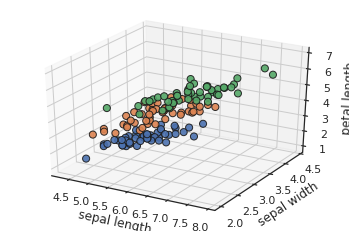

In [3]:
# Visualize raw 3d data

from sklearn.datasets import load_iris


from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
#https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

iris = load_iris()
X = iris.data 
y = iris.target

fig = plt.figure().gca(projection='3d')
colors = ['g', 'b', 'o']
for c in range(3):
  x0 = X[y==c,0]
  x1 = X[y==c,1]
  x2 = X[y==c,2]
  fig.scatter(x0, x1, x2, colors[c], edgecolors='k',s=50, alpha=0.9, \
              marker='o', label=iris.target_names[c])
fig.set_xlabel('sepal length')
fig.set_ylabel('sepal width')
fig.set_zlabel('petal length')
#plt.legend()
#save_fig("iris-3dscatterplot")
plt.show()


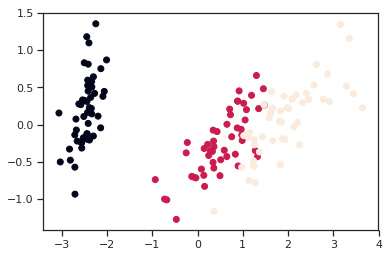

In [5]:
# 2d projection of points

from sklearn.decomposition import PCA

X = iris.data[:,0:3]
pca_xy = PCA(n_components=2).fit_transform(X)
fig, ax = plt.subplots()
ax.scatter(pca_xy[:,0], pca_xy[:,1], c=y)
#save_fig("iris-pca")
plt.show()

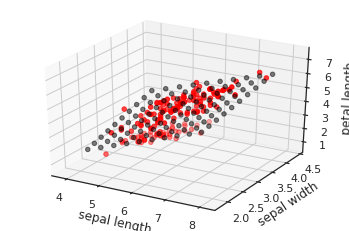

In [6]:
# plot latent 2d projection of points in ambient 3d feature space

pca = PCA(n_components=2)
mu = np.mean(X, axis=0)
Xc = X - mu # center the data
pca.fit(Xc)
W = pca.components_.T # D*K
Z = np.dot(Xc, W) # N * K latent scores
Xrecon = np.dot(Z, W.T) + mu # N*D

# span the latent space in area covered by data
a = np.min(Z[:,0])
b = np.max(Z[:,0])
c = np.min(Z[:,1])
d = np.max(Z[:,1])
z0 = np.linspace(a, b, 10)
z1 = np.linspace(c, d, 10)
ZZ0, ZZ1 = np.meshgrid(z0, z1)
Zgrid = np.c_[ZZ0.ravel(), ZZ1.ravel()] # 100x2
plane = np.dot(Zgrid, W.T) + mu # N*D

latent_corners = np.array([ [a,c], [a,d], [b,c], [b,d] ]) # 4x2
recon_corners  = np.dot(latent_corners, W.T) + mu # 4x3

fig = plt.figure().gca(projection='3d')
scatterplot = fig.scatter(X[:,0], X[:,1], X[:,2], color="red")
#recon = fig.scatter(Xrecon[:,0], Xrecon[:,1], Xrecon[:,2], marker='*', color='green')
lineplot = fig.scatter(plane[:,0], plane[:,1], plane[:,2], color="black", alpha=0.5)
fig.set_xlabel('sepal length')
fig.set_ylabel('sepal width')
fig.set_zlabel('petal length')
#save_fig("iris-pca-3d")
plt.show()
